In [12]:
import matplotlib.pyplot as plt
from math import exp, sqrt
import numpy as np

In [13]:
def lagrangePoly(x,xData,yDaya):
    n = len(xData)
    l = []
    for i in range(0,n):
        a = 1.
        for j in range(0,n):
            if (i != j):
                a = a * (x - xData[j])/(xData[i] - xData[j])
        l.append(a)
    
    p = 0
    for i in range(0,n):
        p += yData[i]*l[i]

    return p

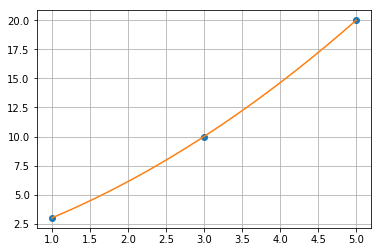

In [14]:
xData = [1, 3, 5]
yData = [3, 10, 20]

x = np.linspace(min(xData),max(xData))

plt.plot(xData,yData,'o',x,lagrangePoly(x,xData,yData),'-')
plt.grid()
plt.show()

In [15]:
def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]

def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)
  # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
    for k in range(0,n-1):
      # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: error.err('Matrix is singular')
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    if abs(a[n-1,n-1]) < tol: error.err('Matrix is singular')
  # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]
    
    
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]
    return gaussPivot(a,b)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

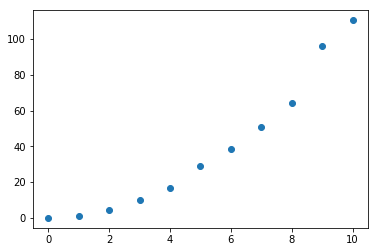

In [18]:
r = np.random.random

xData = np.linspace(0,10,11)
yData = np.zeros(11)
for i in range(11):
    yData[i] = (i*(1+0.1*r()))**2

x = np.linspace(0,10,201)    

def f(x,m):
    c = polyFit(xData,yData,m)
    p = 0
    for i in range(len(c)):
        p += c[i]*(x**i)
    return p

def mapar(f,ar):
    return np.array(list(map(f,ar)))

plt.plot(xData,yData,'o')

for m in range(1,4):
    y.append(mapar(lambda x:f(x,m),x))
    plt.plot(x,mapar(lambda x:f(x,m),x),'-',label = 'm = '+str(m))

plt.legend()
plt.grid()
plt.show()

In [9]:
def logFit(xData,yData):
    n = len(xData)
    xbar, ybar = sum(xData)/n, sum(yData)/n

    # b=b0/b1
    b0, b1 = 0, 0
    for i in range(n):
        b0 += yData[i]*(xData[i]-xbar)
        b1 += xData[i]*(xData[i]-xbar)
    b = b0/b1
    lna = ybar - xbar*b
    a = exp(lna)
    
    # standard deviation
    sigma = 0
    for i in range(n):
        sigma += (yData[i] - lna - b*xData[i])**2
    sigma = sqrt(sigma/(n-2))
    
    return sigma,a,b

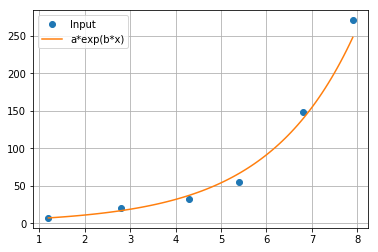

coefficients: ln(a) = 1.3658356516156647  a = 3.9189965998699043  b = 0.5248234538840145
standard deviation = 0.1534083838943964


In [10]:
xData = [1.2, 2.8, 4.3, 5.4, 6.8, 7.9]
lnyData = [ 2, 3, 3.5, 4, 5, 5.6]

x = np.linspace(min(xData),max(xData),100)

sigma,a, b = logFit(xData,lnyData)
y = mapar(lambda x:a*exp(b*x),x)

yData = mapar(lambda y:exp(y),lnyData)
plt.plot(xData,yData,'o',x,y,'-')
plt.legend(['Input','a*exp(b*x)'])
plt.grid()
plt.show()
print('coefficients: ln(a) =',np.log(a),' a =',a,' b =',b)
print('standard deviation =',sigma)

In [7]:
def logFit(xData,yData,weight=np.ones(len(xData))):
    n = len(xData)
    xhat, yhat = 0, 0
    for i in range(n):
        xhat += xData[i]*weight[i]**2
        yhat += yData[i]*weight[i]**2
    xhat /= np.dot(weight,weight); yhat /= np.dot(weight,weight)

    # b=b0/b1
    b0, b1 = 0, 0
    for i in range(n):
        b0 += yData[i]*(xData[i]-xhat)*weight[i]**2
        b1 += xData[i]*(xData[i]-xhat)*weight[i]**2
    b = b0/b1
    lna = yhat - xhat*b
    a = exp(lna)
    
    # standard deviation
    sigma = 0
    for i in range(n):
        sigma += (yData[i] - lna - b*xData[i])**2
    sigma = sqrt(sigma/(n-2))
    
    return sigma,a,b

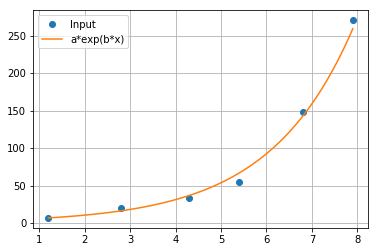

coefficients: ln(a) = 1.27323946688785  a = 3.572406530568428  b = 0.5422627686511121
standard deviation = 0.16141345153011627


In [8]:
xData = [1.2, 2.8, 4.3, 5.4, 6.8, 7.9]
lnyData = [ 2, 3, 3.5, 4, 5, 5.6]

x = np.linspace(min(xData),max(xData),100)
yData = mapar(lambda y:exp(y),lnyData)

sigma,a, b = logFit(xData,lnyData,lnyData)
y = mapar(lambda x:a*exp(b*x),x)

plt.plot(xData,yData,'o',x,y,'-')
plt.legend(['Input','a*exp(b*x)'])
plt.grid()
plt.show()
print('coefficients: ln(a) =',np.log(a),' a =',a,' b =',b)
print('standard deviation =',sigma)